# Data Collection

## Importing Data

In [121]:
# %pip install pandas
# %pip install scipy
# %pip install numpy
# %pip install matplotlib
# %pip install scikit-learn
# %pip install statsmodels
# %pip install tensorflow
# %pip install scikit-survival
# %pip install xgboost
# %pip install factor-analyzer

In [122]:
import pandas as pd
AA02_data = pd.read_csv(r"equity-post-HCT-survival-predictions\train.csv")

## Checking structure of Data

In [124]:
# AA02_data.info()

In [125]:
# AA02_data.head(3)

# Data Preprocessing

## Data Sampling

In [128]:
# Sample 5001 of the data
# AA02_sample_data_0 = AA02_data.sample(n=5001, random_state=55002)

AA02_sample_data_0 = AA02_data.copy()

# AA02_display the first few rows of the sample
# AA02_sample_data_0.head(3)

In [129]:
def AA02_check_unique_values(dataframe):
    """
    Calculate the number of unique values, total values,
    and percentage of unique values for each column in the DataFrame.

    Args:
        dataframe (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A summary DataFrame with unique value statistics.
    """
    # Calculate unique values, total values, and percentage of unique values
    unique_counts = dataframe.nunique()
    total_counts = dataframe.count()
    percentages = (unique_counts / total_counts) * 100

    # Combine the results into a DataFrame for better AA02_display
    summary_AA02_df = pd.DataFrame({
        'Unique Values': unique_counts,
        'Total Values': total_counts,
        'Percentage (%)': percentages
    })

    return summary_AA02_df

## Categorizing Variables

In [131]:
# AA02_sample_data_0.columns

In [132]:
# Check whether a Variable is index or not
# AA02_check_unique_values(AA02_sample_data_0)

In [133]:
# Load the CSV file
file_path = r'equity-post-HCT-survival-predictions\data_dictionary.csv'  # Update with your actual file path
data = pd.read_csv(file_path)

# Extract all variables
AA02_columns = data['variable'].tolist()

# Display the results
# print("All Columns:", AA02_columns)

In [134]:
AA02_sample_data_1 = AA02_sample_data_0[AA02_columns]
# AA02_sample_data_1.head(3)

In [135]:
# Verify whether all variables are non index variables
# AA02_check_unique_values(AA02_sample_data_1)

In [136]:
data['type'] = data['type'].str.strip().str.lower()

# Separate categorical and numerical columns
AA02_categorical_columns = data[data['type'] == 'categorical']['variable'].tolist()
AA02_non_categorical_columns = data[data['type'] == 'numerical']['variable'].tolist()
# print("Categorical Columns:", AA02_categorical_columns)
# print("Numerical Columns:", AA02_non_categorical_columns)

In [137]:
## Divde Categorical variable into two parts ordinal & nominal
AA02_categorical_ordinal_columns = []
AA02_categorical_nominal_columns = AA02_categorical_columns

## Imputation

### Checking Missing Percentage

In [140]:
import pandas as pd

# Function to calculate missing data information
def AA02_missing_data_info(AA02_sample_data):
    # Calculate missing count and percentage
    AA02_missing_count = AA02_sample_data.isnull().sum()
    AA02_missing_percentage = (AA02_missing_count / len(AA02_sample_data)) * 100

    # Create a DataFrame with missing data information
    AA02_missing_info = pd.DataFrame({
        'AA02_Variable': AA02_sample_data.columns,
        'AA02_Missing_Count': AA02_missing_count.values,
        'AA02_Missing_Percentage': AA02_missing_percentage.values
    }).reset_index(drop=True)

    # Format the percentage column
    AA02_missing_info['AA02_Missing_Percentage'] = AA02_missing_info['AA02_Missing_Percentage'].round(2).astype(str) + '%'

    return AA02_missing_info

# Call the function
# AA02_missing_data_info(AA02_sample_data_1)

In [141]:
import pandas as pd

# Function to omit variables with more than a threshold of missing values and log omitted variables
def AA02_clean_data_with_logging(
    AA02_sample_data,
    AA02_categorical_columns,
    AA02_non_categorical_columns,
    AA02_columns,
    missing_threshold=50
):
    # Calculate missing percentage for each variable
    AA02_missing_percentage = (AA02_sample_data.isnull().sum() / len(AA02_sample_data)) * 100

    # Identify variables to omit (missing percentage > threshold)
    variables_to_omit = AA02_missing_percentage[AA02_missing_percentage > missing_threshold]

    # Create a DataFrame for omitted variables
    omitted_info = []
    for variable, percentage in variables_to_omit.items():
        if variable in AA02_categorical_columns:
            source = "AA02_categorical_columns"
        elif variable in AA02_non_categorical_columns:
            source = "AA02_non_categorical_columns"
        elif variable in AA02_columns:
            source = "AA02_columns"
        else:
            source = "Unknown"

        omitted_info.append({
            "Variable": variable,
            "Missing_Percentage": round(percentage, 2),
            "Omitted_From": source
        })

    # Convert omitted info to DataFrame
    AA02_omitted_df = pd.DataFrame(omitted_info)

    # Identify variables to keep
    variables_to_keep = AA02_missing_percentage[AA02_missing_percentage <= missing_threshold].index.tolist()

    # Filter the dataset
    AA02_sample_data_cleaned = AA02_sample_data[variables_to_keep]

    # Update the lists (only keep variables that are not omitted)
    AA02_columns[:] = [col for col in AA02_columns if col in variables_to_keep]
    AA02_categorical_columns[:] = [col for col in AA02_categorical_columns if col in variables_to_keep]
    AA02_non_categorical_columns[:] = [col for col in AA02_non_categorical_columns if col in variables_to_keep]

    # Print the DataFrame of omitted variables
    print("Variables Omitted Due to Missing Values (> {}%):".format(missing_threshold))
    print(AA02_omitted_df)

    return AA02_sample_data_cleaned

# Example usage
# Assuming AA02_sample_data_1, AA02_categorical_columns, AA02_non_categorical_columns, and AA02_columns are defined
AA02_sample_data_cleaned = AA02_clean_data_with_logging(
    AA02_sample_data_1,
    AA02_categorical_columns,
    AA02_non_categorical_columns,
    AA02_columns,
    missing_threshold=50
)


Variables Omitted Due to Missing Values (> 50%):
    Variable  Missing_Percentage              Omitted_From
0    mrd_hct               57.63  AA02_categorical_columns
1  tce_match               65.96  AA02_categorical_columns


In [142]:
# print(AA02_columns)

In [143]:
# Dropping variables from data frame

In [144]:
# Select variables from AA02_sample_data_1 that are present in AA02_columns
AA02_sample_data_dropped_variable = AA02_sample_data_1[AA02_columns]

# Display the resulting dataset
# AA02_sample_data_dropped_variable.head(3)

### Categorical Imputation

In [146]:
from sklearn.impute import SimpleImputer # type: ignore

AA02_sample_data_imputed = AA02_sample_data_dropped_variable.copy()

# Initialize SimpleImputer with most_frequent strategy
AA02_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation
AA02_sample_data_imputed[AA02_categorical_columns] = AA02_imputer.fit_transform(AA02_sample_data_imputed[AA02_categorical_columns])

### Non Categorical Imputation

In [148]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer # type: ignore
import numpy as np

def AA02_impute_columns_with_mean_or_median(AA02_df, columns):
    for col in columns:
        # Ensure column is numeric
        AA02_df[col] = pd.to_numeric(AA02_df[col], errors='coerce')

        # Replace invalid values with NaN
        AA02_df[col].replace([np.inf, -np.inf], np.nan, inplace=True)

        # Skip if column has no missing values
        if AA02_df[col].isnull().sum() == 0:
            continue

        # Calculate mean and median
        AA02_col_mean = AA02_df[col].mean()
        AA02_col_median = AA02_df[col].median()

        # Choose strategy based on significant difference
        if abs(AA02_col_mean - AA02_col_median) / max(abs(AA02_col_mean), abs(AA02_col_median)) > 0.1:  # Significant difference
            print(f"Imputing '{col}' with median (significant difference between mean and median)")
            AA02_imputer = SimpleImputer(strategy='median')
        else:
            print(f"Imputing '{col}' with mean (no significant difference between mean and median)")
            AA02_imputer = SimpleImputer(strategy='mean')

        # Apply the AA02_imputer
        AA02_df[[col]] = AA02_imputer.fit_transform(AA02_df[[col]])

    return AA02_df

AA02_sample_data_imputed = AA02_impute_columns_with_mean_or_median(AA02_sample_data_imputed, AA02_non_categorical_columns)

Imputing 'hla_match_c_high' with median (significant difference between mean and median)
Imputing 'hla_high_res_8' with median (significant difference between mean and median)
Imputing 'hla_low_res_6' with median (significant difference between mean and median)
Imputing 'hla_high_res_6' with median (significant difference between mean and median)
Imputing 'hla_high_res_10' with median (significant difference between mean and median)
Imputing 'hla_match_dqb1_high' with median (significant difference between mean and median)
Imputing 'hla_nmdp_6' with median (significant difference between mean and median)
Imputing 'hla_match_c_low' with median (significant difference between mean and median)
Imputing 'hla_match_drb1_low' with median (significant difference between mean and median)
Imputing 'hla_match_dqb1_low' with median (significant difference between mean and median)
Imputing 'hla_match_a_high' with median (significant difference between mean and median)
Imputing 'donor_age' with mea

### Verify Missing Percetage = 0

In [150]:
# AA02_missing_data_info(AA02_sample_data_imputed)

## Numerical Encoding

### Ordinal/Nominal Encoding

In [153]:
from sklearn.preprocessing import OrdinalEncoder # type: ignore

# Define order for ordinal columns
AA02_ordinal_categories = [
    # ['Import', 'Export'],  # Order for 'Import_Export'
    # ['B', 'A']             # Order for 'Grades' (A is superior to B) A will be written as 1 and b will be written as 0
]
# Initialize OrdinalEncoder for ordinal columns with specified order
ordinal_encoder_ordinal = OrdinalEncoder(categories=AA02_ordinal_categories)

# Initialize OrdinalEncoder for nominal columns (order does not matter)
ordinal_encoder_nominal = OrdinalEncoder()

# Make a copy of the DataFrame
AA02_sample_data_ordinally_encoded = AA02_sample_data_imputed.copy()

# Encode ordinal columns
AA02_sample_data_ordinally_encoded[AA02_categorical_ordinal_columns] = ordinal_encoder_ordinal.fit_transform(
    AA02_sample_data_ordinally_encoded[AA02_categorical_ordinal_columns].astype(str)
)

# Encode nominal columns
AA02_sample_data_ordinally_encoded[AA02_categorical_nominal_columns] = ordinal_encoder_nominal.fit_transform(
    AA02_sample_data_ordinally_encoded[AA02_categorical_nominal_columns].astype(str)
)

# AA02_display the encoded DataFrame
print("DataFrame with Encoded Categorical Variables:")
# AA02_sample_data_ordinally_encoded.head()

DataFrame with Encoded Categorical Variables:


## Transformation

In [155]:
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer # type: ignore
import pandas as pd

# Function to handle transformations based on distribution characteristics
def apply_transformations(AA02_sample_data, columns):
    # Initialize a list to store transformation logs
    AA02_transformation_logs = []

    for column in columns:
        # Compute AA02_skewness and AA02_kurtosis
        AA02_skewness = AA02_sample_data[column].skew()
        AA02_kurtosis = AA02_sample_data[column].kurt()
        AA02_action = "None"  # Default AA02_action

        # Handle Right Skew (Positive Skew)
        if AA02_skewness > 1:
            AA02_action = "Log Transformation"
            AA02_sample_data[column] = np.log1p(AA02_sample_data[column])

        # Handle Left Skew (Negative Skew)
        elif AA02_skewness < -1:
            AA02_action = "Reflect and Log Transformation"
            AA02_sample_data[column] = np.log1p(AA02_sample_data[column].max() - AA02_sample_data[column])

        # Handle High Kurtosis (Heavy Tails)
        if AA02_kurtosis > 3:
            try:
                AA02_action = "Box-Cox Transformation"
                AA02_sample_data[column], _ = boxcox(AA02_sample_data[column].clip(lower=1))
            except ValueError:
                AA02_action = "Box-Cox Failed, Applied Yeo-Johnson"
                transformer = PowerTransformer(method='yeo-johnson')
                AA02_sample_data[column] = transformer.fit_transform(AA02_sample_data[[column]])

        # Handle Low Kurtosis (Light Tails)
        elif AA02_kurtosis < 3 and AA02_action == "None":
            AA02_action = "Yeo-Johnson Transformation"
            transformer = PowerTransformer(method='yeo-johnson')
            AA02_sample_data[column] = transformer.fit_transform(AA02_sample_data[[column]])

        # Append the log entry
        AA02_transformation_logs.append({
            'Column Name': column,
            'Skewness': AA02_skewness,
            'Kurtosis': AA02_kurtosis,
            'Action Taken': AA02_action
        })

    # Create a DataFrame for transformation logs
    transformation_log_AA02_df = pd.DataFrame(AA02_transformation_logs)
    return AA02_sample_data, transformation_log_AA02_df

# Example usage with AA02_sample_data_encoded
AA02_sample_data_encoded = AA02_sample_data_ordinally_encoded.copy()
AA02_sample_data_encoded, AA02_transformation_logs = apply_transformations(AA02_sample_data_encoded, AA02_non_categorical_columns)

# AA02_display the transformation log DataFrame
# print("Transformation Log:")
# AA02_transformation_logs

In [156]:
# Code for AA02_displaying transformed datset
# AA02_sample_data_encoded.head(5)

# Machine Learning

## Dependent/Independent variables

### Function to define Independent Variables

In [160]:
def prepare_data(AA02_y_vars, AA02_cat_vars, AA02_non_cat_vars):
    """
    Prepares the data by calculating the feature set (AA02_x) while excluding dependent variables.

    Args:
    - AA02_y_vars: A list of dependent variable names (can handle multiple dependent variables).
    - AA02_cat_vars: A list of categorical variable names.
    - AA02_non_cat_vars: A list of non-categorical variable names.

    Returns:
    - AA02_y_vars: A list of dependent variable names.
    - AA02_x: A list of feature variable names, excluding dependent variables.
    """
    # Combine categorical and non-categorical variable lists
    AA02_all_vars = AA02_cat_vars + AA02_non_cat_vars

    # Ensure `AA02_y_vars` is a list for consistency
    if isinstance(AA02_y_vars, str):
        AA02_y_vars = [AA02_y_vars]

    # Calculate the feature set (x) as the difference between AA02_all_vars and y_vars
    AA02_x = [AA02_var for AA02_var in AA02_all_vars if AA02_var not in AA02_y_vars]

    return AA02_y_vars, AA02_x

### Defining Dependent Variable

In [162]:
AA02_y = ['efs', 'efs_time']  # Target variable defined manually

AA02_y_columns, AA02_x_columns = prepare_data(AA02_y, AA02_categorical_columns, AA02_non_categorical_columns)

# print("Target (y):", AA02_y_columns)
# print("Feature Set (x):", AA02_x_columns)

## Train Test Split

In [164]:
from sklearn.model_selection import train_test_split

AA02_sample_data_5 = AA02_sample_data_encoded.copy()

# Extract the target columns (multi-output targets)
AA02_y_data = AA02_sample_data_5[AA02_y_columns]  # AA02_y_columns should be a list like ['efs', 'efs_time']

# Extract the features (as DataFrame)
AA02_x_data = AA02_sample_data_5[AA02_x_columns]  # AA02_x_columns is the list of feature column names

# Perform the train-test split
AA02_x_train, AA02_x_test, AA02_y_train, AA02_y_test = train_test_split(
    AA02_x_data, AA02_y_data, test_size=None, random_state=55002, stratify=AA02_y_data['efs']  # Stratify by 'efs'
)

## Factor Analysis

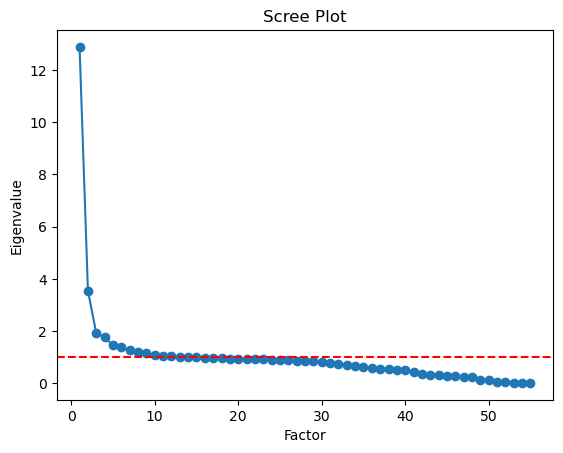

In [166]:
import pandas as pd
from factor_analyzer import FactorAnalyzer

# Check the correlation matrix
correlation_matrix = AA02_x_train.corr()
# print("Correlation Matrix:\n", correlation_matrix)

# Perform factor analysis
fa = FactorAnalyzer(n_factors=5, rotation="varimax")  # Adjust 'n_factors' as needed
fa.fit(AA02_x_train)

# Get eigenvalues to decide the number of factors to retain
eigenvalues, _ = fa.get_eigenvalues()
# print("Eigenvalues:\n", eigenvalues)

# Plot eigenvalues to visualize
import matplotlib.pyplot as plt

plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title("Scree Plot")
plt.xlabel("Factor")
plt.ylabel("Eigenvalue")
plt.axhline(1, color='red', linestyle='--')  # Retain factors with eigenvalue > 1
plt.show()

# Factor loadings
factor_loadings = pd.DataFrame(fa.loadings_, index=AA02_x_train.columns)
# print("Factor Loadings:\n", factor_loadings)

In [167]:
# Select important variables (e.g., variables with loadings > 0.5)
important_variables = factor_loadings[(factor_loadings.abs() > 0.5).any(axis=1)]
# print("Important Variables:\n", important_variables)

In [168]:
# Create a list of important variables including 'efs'
important_variables_list = list(important_variables.index)  # Extract variable names from important_variables

# Ensure 'efs' is included in the list
# if 'efs' not in important_variables_list:
    # important_variables_list.append('efs')  # Add 'efs' explicitly to the list

# Subset train and test datasets
AA02_x_train = AA02_x_train[important_variables_list]
AA02_x_test = AA02_x_test[important_variables_list]

## Train test split verification

In [170]:
import pandas as pd

# Compute unique value counts for AA02_x_train and AA02_x_test
AA02_unique_values_AA02_x_train = AA02_x_train.nunique()
AA02_unique_values_AA02_x_test = AA02_x_test.nunique()

# Safely compute unique value counts for dependent variables in AA02_y_train and AA02_y_test
AA02_unique_values_AA02_y_train = {}
AA02_unique_values_AA02_y_test = {}

for y in AA02_y_columns:
    if y in AA02_y_train.columns:
        AA02_unique_values_AA02_y_train[y] = AA02_y_train[y].nunique()
    else:
        print(f"Warning: '{y}' not found in AA02_y_train")
    
    if y in AA02_y_test.columns:
        AA02_unique_values_AA02_y_test[y] = AA02_y_test[y].nunique()
    else:
        print(f"Warning: '{y}' not found in AA02_y_test")

# Convert to pandas Series
AA02_unique_values_AA02_y_train = pd.Series(AA02_unique_values_AA02_y_train)
AA02_unique_values_AA02_y_test = pd.Series(AA02_unique_values_AA02_y_test)

# Combine the results into a single DataFrame
AA02_unique_values_AA02_df = pd.DataFrame({
    'AA02_x_train': AA02_unique_values_AA02_x_train,
    'AA02_x_test': AA02_unique_values_AA02_x_test,
    'AA02_y_train': AA02_unique_values_AA02_y_train,
    'AA02_y_test': AA02_unique_values_AA02_y_test
})

# Display the DataFrame
# AA02_unique_values_AA02_df

## Neural Network

In [172]:
import pandas as pd
from itertools import combinations
from sklearn.metrics import mean_squared_error, r2_score
from sksurv.metrics import concordance_index_censored
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
import numpy as np

# Initialize the results DataFrame
results_list = []

# Ensure important variables list is at least 100% of total columns
min_important_vars = max(int(0.97 * len(important_variables_list)), 1)

# Generate all combinations of variables meeting the 100% condition
for r in range(min_important_vars, len(important_variables_list) + 1):
    for subset in combinations(important_variables_list, r):
        # Subset the train and test data
        AA02_x_train_subset = AA02_x_train[list(subset)]
        AA02_x_test_subset = AA02_x_test[list(subset)]

        # Define the model
        input_layer = Input(shape=(AA02_x_train_subset.shape[1],), name="input_layer")
        shared_layer = Dense(128, activation="relu")(input_layer)
        shared_layer = Dropout(0.3)(shared_layer)
        shared_layer = Dense(64, activation="relu")(shared_layer)
        efs_time_output = Dense(1, activation="linear", name="efs_time_output")(shared_layer)

        model = Model(inputs=input_layer, outputs=efs_time_output)
        model.compile(optimizer="adam", loss="mse", metrics=["mse"])

        # Train the model
        model.fit(
            AA02_x_train_subset,
            AA02_y_train["efs_time"],
            validation_data=(AA02_x_test_subset, AA02_y_test["efs_time"]),
            epochs=10,
            batch_size=64,
            verbose=0
        )

        # Predict and evaluate
        efs_time_predictions = model.predict(AA02_x_test_subset).ravel()
        event_indicator = AA02_y_test["efs"].values.astype(bool)
        event_time = AA02_y_test["efs_time"].values

        efs_time_cindex = concordance_index_censored(
            event_indicator,  # Event indicator
            event_time,       # Observed survival times
            -efs_time_predictions  # Predicted risk scores
        )
        if isinstance(efs_time_cindex, tuple):
            efs_time_cindex = efs_time_cindex[0]

        efs_time_r2 = r2_score(AA02_y_test["efs_time"], efs_time_predictions)

        # Store results in a dictionary
        result = {
            "C-index": efs_time_cindex,
            "R²": efs_time_r2
        }

        # Add variable presence
        for var in important_variables_list:
            result[var] = 1 if var in subset else 0

        results_list.append(result)

# Convert results list to DataFrame
results_df = pd.DataFrame(results_list)

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step
225/225 ━━━

In [173]:
results_df

,C-index,R²,dri_score,graft_type,tce_imm_match,prod_type,tce_div_match,donor_related,hla_match_c_high,hla_high_res_8,...,hla_match_dqb1_low,hla_match_a_high,hla_match_b_low,age_at_hct,hla_match_a_low,hla_match_b_high,comorbidity_score,hla_low_res_8,hla_match_drb1_high,hla_low_res_10
0,0.621059,0.082448,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
1,0.626136,0.079978,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
2,0.619670,0.078845,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
3,0.612864,0.066270,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
4,0.622464,0.073556,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
5,0.619155,0.064728,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
6,0.623180,0.078843,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
7,0.628389,0.088159,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
8,0.625458,0.086957,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
9,0.621243,0.074238,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1


# Prediction

## Loading Dataset

In [176]:
test_file_path = r'equity-post-HCT-survival-predictions/test.csv'

In [177]:
test_dataframe = pd.read_csv(test_file_path)
test_dataframe

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10
0,28800,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0
1,28801,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0
2,28802,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0


## Imputaion

### Missing Percentage

In [180]:
import pandas as pd

# Function to calculate missing data information
def AA02_missing_data_info(AA02_sample_data):
    # Calculate missing count and percentage
    AA02_missing_count = AA02_sample_data.isnull().sum()
    AA02_missing_percentage = (AA02_missing_count / len(AA02_sample_data)) * 100

    # Create a DataFrame with missing data information
    AA02_missing_info = pd.DataFrame({
        'AA02_Variable': AA02_sample_data.columns,
        'AA02_Missing_Count': AA02_missing_count.values,
        'AA02_Missing_Percentage': AA02_missing_percentage.values
    }).reset_index(drop=True)

    # Format the percentage column
    AA02_missing_info['AA02_Missing_Percentage'] = AA02_missing_info['AA02_Missing_Percentage'].round(2).astype(str) + '%'

    return AA02_missing_info

# Call the function
# AA02_missing_data_info(test_dataframe)

### Categorical imputaion

In [182]:
from sklearn.impute import SimpleImputer # type: ignore

test_dataframe_imputed = test_dataframe.copy()

# Initialize SimpleImputer with most_frequent strategy
AA02_imputer = SimpleImputer(strategy='most_frequent')

if 'efs' in AA02_categorical_columns:
    AA02_categorical_columns.remove('efs')

# Apply imputation
test_dataframe_imputed[AA02_categorical_columns] = AA02_imputer.fit_transform(test_dataframe_imputed[AA02_categorical_columns])

### Non Categorical Imputation 

In [184]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer # type: ignore
import numpy as np

def AA02_impute_columns_with_mean_or_median(AA02_df, columns):
    for col in columns:
        # Ensure column is numeric
        AA02_df[col] = pd.to_numeric(AA02_df[col], errors='coerce')

        # Replace invalid values with NaN
        AA02_df[col].replace([np.inf, -np.inf], np.nan, inplace=True)

        # Skip if column has no missing values
        if AA02_df[col].isnull().sum() == 0:
            continue

        # Calculate mean and median
        AA02_col_mean = AA02_df[col].mean()
        AA02_col_median = AA02_df[col].median()

        # Choose strategy based on significant difference
        if abs(AA02_col_mean - AA02_col_median) / max(abs(AA02_col_mean), abs(AA02_col_median)) > 0.1:  # Significant difference
            print(f"Imputing '{col}' with median (significant difference between mean and median)")
            AA02_imputer = SimpleImputer(strategy='median')
        else:
            print(f"Imputing '{col}' with mean (no significant difference between mean and median)")
            AA02_imputer = SimpleImputer(strategy='mean')

        # Apply the AA02_imputer
        AA02_df[[col]] = AA02_imputer.fit_transform(AA02_df[[col]])

    return AA02_df

if 'efs_time' in AA02_non_categorical_columns:
    AA02_non_categorical_columns.remove('efs_time')


test_dataframe_imputed = AA02_impute_columns_with_mean_or_median(test_dataframe_imputed, AA02_non_categorical_columns)

Imputing 'hla_match_c_high' with mean (no significant difference between mean and median)
Imputing 'hla_high_res_8' with mean (no significant difference between mean and median)
Imputing 'hla_high_res_10' with mean (no significant difference between mean and median)
Imputing 'donor_age' with mean (no significant difference between mean and median)


## Encoding

In [186]:
from sklearn.preprocessing import OrdinalEncoder # type: ignore

# Define order for ordinal columns
AA02_ordinal_categories = [
    # ['Import', 'Export'],  # Order for 'Import_Export'
    # ['B', 'A']             # Order for 'Grades' (A is superior to B) A will be written as 1 and b will be written as 0
]
# Initialize OrdinalEncoder for ordinal columns with specified order
ordinal_encoder_ordinal = OrdinalEncoder(categories=AA02_ordinal_categories)

# Initialize OrdinalEncoder for nominal columns (order does not matter)
ordinal_encoder_nominal = OrdinalEncoder()

# Make a copy of the DataFrame
test_dataframe_imputed_ordinally_encoded = test_dataframe_imputed.copy()

# Encode ordinal columns
test_dataframe_imputed_ordinally_encoded[AA02_categorical_ordinal_columns] = ordinal_encoder_ordinal.fit_transform(
    test_dataframe_imputed_ordinally_encoded[AA02_categorical_ordinal_columns].astype(str)
)

# Encode nominal columns
test_dataframe_imputed_ordinally_encoded[AA02_categorical_nominal_columns] = ordinal_encoder_nominal.fit_transform(
    test_dataframe_imputed_ordinally_encoded[AA02_categorical_nominal_columns].astype(str)
)

# AA02_display the encoded DataFrame
print("DataFrame with Encoded Categorical Variables:")
test_dataframe_imputed_ordinally_encoded.head()

DataFrame with Encoded Categorical Variables:


,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10
0,28800,1.0,0.0,0.0,0.0,2.0,8.0,0.0,0.0,6.0,...,90.0,0.0,0.0,1.0,0.0,8.0,0.0,2.0,0.0,10.0
1,28801,0.0,0.0,0.0,0.0,2.0,8.0,1.0,0.0,6.0,...,90.0,0.0,0.0,0.0,0.0,8.0,0.0,2.0,1.0,10.0
2,28802,1.0,0.0,0.0,0.0,2.0,8.0,0.0,0.0,6.0,...,90.0,0.0,0.0,0.0,0.0,8.0,0.0,2.0,0.0,10.0


## Transformation

In [188]:
test_dataframe_transformed, log = apply_transformations(test_dataframe_imputed_ordinally_encoded,AA02_non_categorical_columns) 
test_dataframe_transformed

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10
0,28800,1.0,0.0,0.0,0.0,2.0,8.0,0.0,0.0,6.0,...,90.0,0.0,0.0,1.0,0.0,8.0,0.0,2.0,0.0,10.0
1,28801,0.0,0.0,0.0,0.0,2.0,8.0,1.0,0.0,6.0,...,90.0,0.0,0.0,0.0,0.0,8.0,0.0,2.0,1.0,10.0
2,28802,1.0,0.0,0.0,0.0,2.0,8.0,0.0,0.0,6.0,...,90.0,0.0,0.0,0.0,0.0,8.0,0.0,2.0,0.0,10.0


## Prediction

In [190]:
# Ensure the dataset contains only the features the model was trained on
AA02_x_test_subset = test_dataframe_transformed[AA02_x_train.columns.tolist()]

# Make predictions
efs_time_predictions = model.predict(AA02_x_test_subset)

# Convert predictions to a suitable format (flatten the array)
efs_time_predictions = efs_time_predictions.ravel()

# Add predictions to the dataset for reference
test_dataframe_transformed['Predicted_efs_time'] = efs_time_predictions

# Create a DataFrame for ID and predictions
predictions_output = test_dataframe_transformed[['ID', 'Predicted_efs_time']]

# Display the DataFrame with ID and predictions
predictions_output

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


,ID,Predicted_efs_time
0,28800,0.968647
1,28801,0.835898
2,28802,1.082357


# Notebook Closed